In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import StrMethodFormatter

In [36]:
bit_list = [6, 7, 8, 9, 10, 11]
lr_list = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
num_exps = range(3)

# /data1/jcampos/loss_landscape/workspace/checkpoint/different_knobs_subset_10/lr_0.1/normal/ECON_6b/autoencoder/autoencoder_emd_exp_0.txt

for bit in bit_list:
    for lr in lr_list:
        emd_list = []
        for exp in num_exps:
            file = f'/data1/jcampos/loss_landscape/workspace/checkpoint/different_knobs_subset_10/lr_{lr}/normal/ECON_{bit}b/autoencoder/autoencoder_emd_exp_{exp}.txt'
            if os.path.exists(file) is False:
                print(f'Rerun experiment:\n\t{file}')
                continue
            f = open(file, "r")
            emd_list.append(float(f.read()))
            f.close()
        # save EMD for each trial 
        file = f'/data1/jcampos/loss_landscape/workspace/checkpoint/different_knobs_subset_10/lr_{lr}/normal/ECON_{bit}b/metrics'
        if os.path.exists(file) is False:
            os.mkdir(file)
        # else:
            # continue
        emd_arr = np.array(emd_list)
        # np.save(os.path.join(file, 'emd'), emd_arr)
        with open(os.path.join(file, 'emd.pkl'), 'wb') as f:
            pickle.dump(emd_list, f)
        print(f'EMD for LR {lr}: {emd_arr}')
        print(f'{np.average(emd_arr)}')

EMD for LR 0.1: [-0.5 -0.5 -0.5]
-0.5
EMD for LR 0.05: [-0.49978442 -0.5        -0.41581768]
-0.4718673652160465
EMD for LR 0.025: [7.50452308 6.74537099 7.97857374]
7.409489268448699
EMD for LR 0.0125: [1.52361148 1.48197514 1.46388325]
1.489823289161546
EMD for LR 0.00625: [1.25029661 1.18246594 1.26623485]
1.2329991366905286
EMD for LR 0.003125: [1.18105537 1.2497429  1.09332811]
1.174708791742095
EMD for LR 0.0015625: [1.46780714 1.10938647 1.13768038]
1.238291330642735
EMD for LR 0.1: [-0.5 -0.5 -0.5]
-0.5
EMD for LR 0.05: [-0.5         1.62628437 -0.36115706]
0.2550424343660177
EMD for LR 0.025: [6.99542961 1.92142689 3.51548539]
4.144113960816831
EMD for LR 0.0125: [1.46490144 1.32562876 1.45258196]
1.4143707178767688
EMD for LR 0.00625: [1.40370374 1.27618232 1.47983667]
1.3865742442699192
EMD for LR 0.003125: [1.10463901 1.19941639 1.17021375]
1.1580897146342275
EMD for LR 0.0015625: [1.57878024 1.2133589  1.46424754]
1.4187955608006144
EMD for LR 0.1: [-0.5 -0.5 -0.5]
-0.5
EM

In [37]:
def get_metric_file(ckpt_folder, metric):
    
    if metric == 'test_acc':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'loss_acc_gaussian1.0_np.pkl')
    elif metric == 'loss':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'loss_acc_gaussian1.0_np.pkl')
    elif metric == 'CKA':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'CKA_mixup_alpha_16.pkl')
    elif 'hessian' in metric:
        file_name = os.path.join(ckpt_folder, 'metrics/', 'hessian_test.pkl')
    elif metric == 'mode_connectivity':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'curve_test.npz')
    elif metric == 'L2':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'model_dist.pkl')
    elif metric == 'neural_eff':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'neural_eff.pkl')
    elif metric == 'gradient':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'gradient.pkl')
    elif metric == 'fisher':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'fisher.pkl')
    elif metric == 'emd':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'emd.pkl')
    # print(file_name)
    assert os.path.exists(file_name), f'File {file_name} does not exist'
    return file_name

In [38]:
def get_metric_val(metric_file, metric):
    
    if metric == 'test_acc':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean([results[n]['accuracy'] for n in range(3)])
    if metric == 'loss':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean([results[n]['loss'] for n in range(3)])
    elif metric == 'neural_eff':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'emd':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'gradient':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'fisher':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'CKA':
        results = pickle.load(open(metric_file, "rb"))
        CKA_all = []
        for exp_ind1 in range(3):
            for exp_ind2 in range(3):
                if exp_ind1 != exp_ind2:
                    CKA_all.append(results['representation_similarity'][exp_ind1][exp_ind2][-1])
        return np.mean(CKA_all)
    elif 'hessian' in metric:
        results = pickle.load(open(metric_file, "rb"))
        if '_e' in metric:
            return np.log(np.mean([results[n]['top_eigenvalue'][0] for n in range(3)]))
        elif '_t' in metric:
            # print(np.log(np.mean([results[n]['trace'] for n in range(3)])))
            # return np.mean([results[n]['trace'] for n in range(3)])
            return np.log(np.mean([results[n]['trace'] for n in range(3)]))
    elif metric == 'mode_connectivity':
        result = np.load(metric_file)['tr_err']
        u = np.argmax(np.abs(result - (result[0] + result[4])/2))
        return (result[0] + result[4])/2 - result[u]
    elif metric == 'L2':
        results = pickle.load(open(metric_file, "rb"))
        dist_all = []
        for exp_ind1 in range(3):
            for exp_ind2 in range(3):
                if exp_ind1 != exp_ind2:
                    dist_all.append(results['model_distance'][exp_ind1][exp_ind2]['dist'])
        return np.mean(dist_all)

In [51]:
def vminmax(metric):
    if metric == 'test_acc':
        vmin, vmax = 0.32, .38
        # vmin, vmax = 0.14, .25
    elif metric == 'loss':
        vmin, vmax = 37, 41
    elif metric == 'CKA':
        vmin, vmax = 0.85, .98
    elif metric == 'mode_connectivity':
        vmin, vmax = -30, 30
    elif metric == 'L2':
        vmin, vmax = 15, 23
    elif metric == 'hessian_e':
        vmin, vmax = 0, -4.5
    elif metric == 'hessian_t':
        vmin, vmax = -6, 0
    elif metric == 'neural_eff':
        vmin, vmax = 0, 1
    elif metric == 'gradient':
        vmin, vmax = -.6, .6
    elif metric == 'fisher':
        vmin, vmax = 0.2, 0.6
    elif metric == 'emd':
        vmin, vmax = -1, 2.5
        
    return vmin, vmax

In [52]:
def plot_2Dphase(phase2D, x_label_list, y_label_list, metric, metric_title):
    
    fig, ax = plt.subplots(1,1, figsize = (5,4))
    
    X,Y = np.meshgrid(x_label_list, y_label_list)
    vmin, vmax = vminmax(metric)
    
    if metric == 'mode_connectivity':
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="seismic")
    elif metric in ['L2', 'loss', 'hessian_e', 'hessian_t']:
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="viridis_r")
    else:
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="viridis",edgecolors='k')
    
    ax.set_xscale("linear")
                
    ax.set_yticks(y_label_list)
    ax.set_yscale("log")
    ax.invert_yaxis()
    
    ax.set_xlabel('Bit Width', fontsize=20)
    ax.set_ylabel(f'T (Batch Size)', fontsize=20)
    ax.set_title(metric_title, fontsize=20)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = plt.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=18)
    plt.savefig(f'{metric}.png')

[6, 7, 8, 9, 10, 11]
[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
Metric : emd - max/min : 7.409489268448699/-0.5


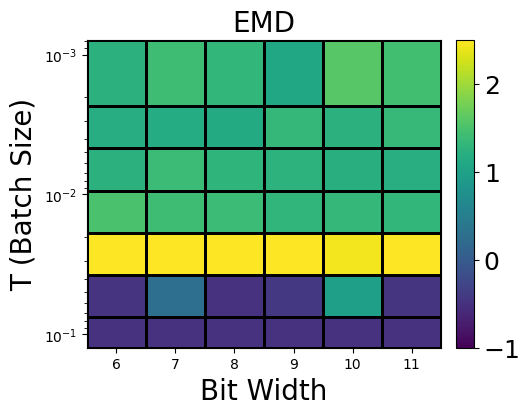

In [53]:
width_list = [6, 7, 8, 9, 10,11]# [6,7, #[2, 3, 4, 6, 8, 11, 16, 23, 32, 45, 64, 91, 128]
bs_list = [16, 32, 64, 128, 256, 512, 1024]
lr_list = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
# metric_list = ['neural_eff']
metric_list = ['emd']#, 'loss']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t', 'hessian_e', 'CKA', 'neural_eff']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t', 'hessian_e', 'CKA', 'neural_eff', 'gradient']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t', 'CKA',]# 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_title_list = ['Neural Efficiency']
metric_title_list = ['EMD', 'Test loss', 'Hessian trace', 'CKA', 'Model distance (L2)', 'Neural Efficiency', 'Gradient Traces', 'Model distance (L2)']

bs_list = lr_list

for metric, metric_title in zip(metric_list, metric_title_list):

    lenx = len(width_list)
    leny = len(bs_list)
    phase2D = np.zeros((leny, lenx))

    for j,width in enumerate(width_list):
        for i,lr in enumerate(bs_list):
            # ckpt_folder = f'../../checkpoint/different_knobs_subset_10/lr_{lr}/lr_decay/JT_{width}b/'
            ckpt_folder = f'../checkpoint/different_knobs_subset_10/lr_{lr}/normal/ECON_{width}b/'
            # ckpt_folder = f'../../checkpoint/different_knobs_subset_10/bs_{lr}/bs_decay/JT_{width}b/'
            metric_file = get_metric_file(ckpt_folder, metric)
            phase2D[i][j] = get_metric_val(metric_file, metric)
    print(width_list)
    print(bs_list)
    print(f'Metric : {metric} - max/min : {phase2D.max()}/{phase2D.min()}')
    plot_2Dphase(phase2D, width_list, bs_list, metric, metric_title)


In [50]:
print(phase2D.min())
print(phase2D.max())

-0.5
7.409489268448699
